In [9]:
import numpy as np
import pandas as pd

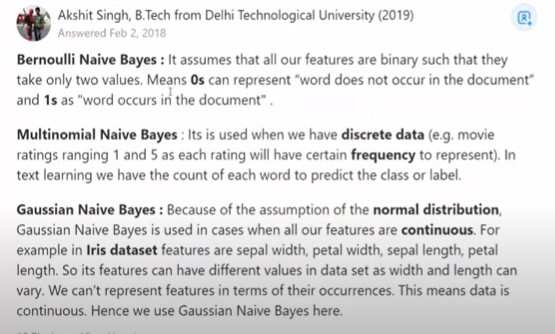

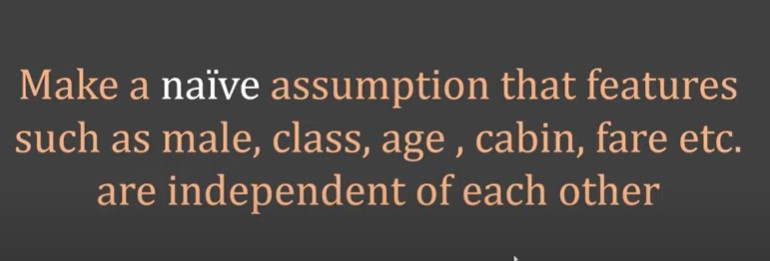

In [10]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [11]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [12]:
target=df['Survived']
inputs = df.drop('Survived',axis='columns')

In [13]:
dummies = pd.get_dummies(inputs['Sex'])
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [14]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [15]:
inputs.columns[inputs.isna().any()] #check for null
inputs = inputs.drop('Sex',axis='columns')

In [16]:
inputs['Age'] = inputs['Age'].fillna(inputs['Age'].mean())
inputs.head(6)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [18]:
len(X_train)

712

In [19]:
len(X_test)

179

In [20]:
len(inputs)

891

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [22]:
model.fit(X_train,y_train)

GaussianNB()

In [23]:
model.score(X_test,y_test)

0.8156424581005587

In [24]:
model.predict(X_test)

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [25]:
model.predict_proba(X_test)

array([[3.93409856e-02, 9.60659014e-01],
       [2.76068737e-02, 9.72393126e-01],
       [9.88028624e-01, 1.19713764e-02],
       [8.91276692e-01, 1.08723308e-01],
       [8.61701927e-07, 9.99999138e-01],
       [9.01381880e-01, 9.86181199e-02],
       [9.88043767e-01, 1.19562331e-02],
       [4.14086573e-02, 9.58591343e-01],
       [5.08934156e-03, 9.94910658e-01],
       [4.72384723e-02, 9.52761528e-01],
       [9.73104308e-01, 2.68956919e-02],
       [3.93299140e-02, 9.60670086e-01],
       [4.29377624e-02, 9.57062238e-01],
       [9.88028624e-01, 1.19713764e-02],
       [9.06895752e-02, 9.09310425e-01],
       [9.87523430e-01, 1.24765698e-02],
       [1.87465065e-03, 9.98125349e-01],
       [6.18711552e-14, 1.00000000e+00],
       [4.01137320e-02, 9.59886268e-01],
       [8.70437488e-02, 9.12956251e-01],
       [9.74155083e-01, 2.58449167e-02],
       [6.94242107e-01, 3.05757893e-01],
       [7.94603399e-07, 9.99999205e-01],
       [8.87910631e-01, 1.12089369e-01],
       [9.873905